In [1]:
# ! pip install opencv-python
# ! pip install numpy
# ! pip install python-math
# ! pip install Pillow

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter
import math
import matplotlib as mpl
from scipy import fftpack
import numpy.fft as fp

### Image Preprocessing

In [3]:
# Loading the original image for processing and searching for defects
# It is necessary to specify the name of the image previously uploaded to the Jupiter library
img = Image.open("006450.png")

# Image Preprocessing
img = img.filter(ImageFilter.GaussianBlur(3))
enhancer_2 = ImageEnhance.Brightness(img)
factor = 6
im_1 = enhancer_2.enhance(factor)

enhancer_1 = ImageEnhance.Contrast(im_1)
factor = 6
im_output = enhancer_1.enhance(factor)
im_output = enhancer_2.enhance(factor)

#The image is saved to a new file with improved brightness and a pre-applied Gaussian blur filter.
im_output.save('constrast_image_project.png')



In [4]:
img = plt.imread('constrast_image_project.png')

### Implementing Fourier transformation

<ipython-input-5-d68cbb2aa7dc>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(20*np.log10(F2).astype(int), cmap=plt.cm.gray)


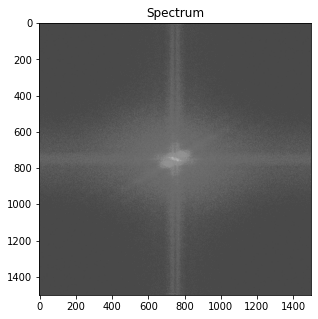

In [5]:
F1 = fftpack.fft2((img).astype(float))
F2 = fftpack.fftshift(F1)
F_image = fp.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(5,5))
plt.title("Spectrum")

plt.imshow(20*np.log10(F2).astype(int), cmap=plt.cm.gray)
plt.show()

<ipython-input-6-2829e02f9f54>:13: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(F2).astype(int), cmap=plt.cm.gray)
<ipython-input-6-2829e02f9f54>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(20*np.log10(F2).astype(int), cmap=plt.cm.gray)


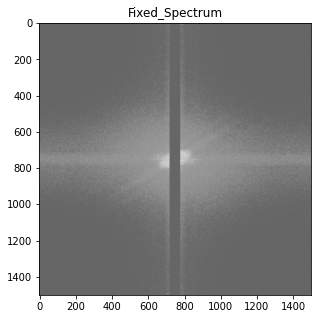

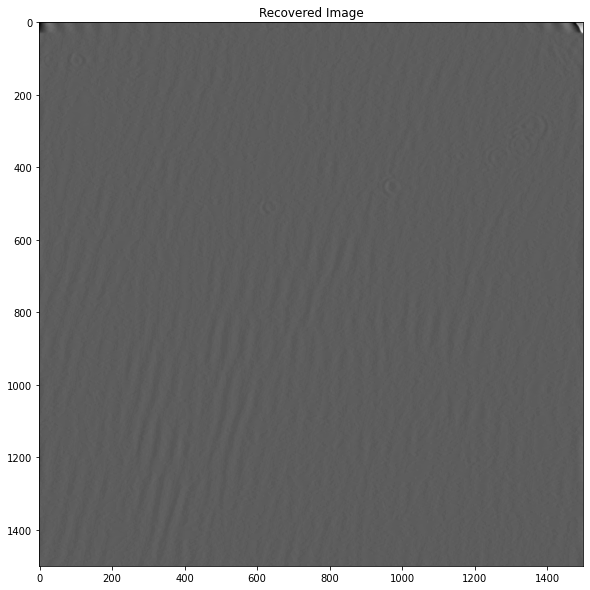

In [6]:
F1 = fftpack.fft2((img).astype(float))
F2 = fftpack.fftshift(F1)

for i in range(0, 1600):
    for j in range(730, 770):
        if not (i == 330 and j == 500):
            F2[i - 10:i + 10, j - 10:j + 10] = 0

F_image = fp.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(5,5))
plt.title("Fixed_Spectrum")

plt.imshow(20*np.log10(F2).astype(int), cmap=plt.cm.gray)
plt.show()


im1 = fp.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.title("Recovered Image")
plt.imshow(im1, cmap='gray')
plt.show()

mpl.image.imsave('fourier_image_project.png', F_image)

Fourier_image = cv2.imread('fourier_image_project.png')

In [7]:
blur = cv2.GaussianBlur(Fourier_image, (7, 7), 2)

# Find edges
t_lower = 10
t_upper = 16
blur = blur[50:1450, 50:1450]
edge_detected_image = cv2.Canny(blur, t_lower, t_upper )

backtorgb = cv2.cvtColor(edge_detected_image,cv2.COLOR_GRAY2RGB)

### Searching the defects

In [8]:
# Number of defects
n = 0
# finding the contours
contours, _ = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
cv2.drawContours(blur, contours, -1, (0, 255, 0), 3)
(x_prev, y_prev) = 0, 0
for i in contours:
    (x_axis, y_axis), radius = cv2.minEnclosingCircle(i)
    if math.sqrt((x_prev - x_axis)**2 + (y_prev - y_axis)**2) > radius + 50:
        center = (int(x_axis), int(y_axis))
        radius = int(radius) + 50
        cv2.circle(blur, center, radius, (0, 0, 255), 2)
        n += 1
    (x_prev, y_prev) = (x_axis, y_axis)

### Finalizing and checking the result

In [ ]:
# Number of detected defects
print(f'There were found {n} defects on the current layer')
# Viewing the given image
cv2.imshow("Given image", img)
# Viewing final result
cv2.imshow('result', blur)
# Saving the result in Jupyter notebook library
cv2.imwrite("final_image.png", blur)
cv2.waitKey(0)

There were found 7 defects on the current layer
